<a href="https://colab.research.google.com/github/jdmartinezrs/incomesAndBillsProject/blob/main/mejorandoMision1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Aca comieza dt

In [9]:
import pandas as pd

sheet_id = '1r4szNXN8abPstdpZEtuePc89H6AJPgjq'
sheet_url = f'https://drive.google.com/uc?id={sheet_id}&export=download'

dt = pd.read_csv(sheet_url)

In [10]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt



In [12]:
print(dt.head())


        Fecha  ITEM CODIGO DE EQUIPO Tipo de Vehiculo fecha de revision  \
0  2024-11-27     1  VE-DT-CH-XMD112        IRRIGADOR        2024-11-27   
1  2024-12-02     2  VE-DT-HR-XMD382    VOLQ SENCILLA        2024-12-02   
2  2025-01-04     3  VE-DT-HR-XMD878      DOBLETROQUE        2025-01-04   
3  2025-01-08     4  VE-DT-CM-XMD818    VOLQ SENCILLA        2025-01-08   
4  2024-10-03     5  VE-DT-CH-XMD244             GRUA        2024-10-03   

   Km/ Hr Plan Fecha Ult Pre-Operacional  Dias Pend  Ult Km/Hr  Km/Hr Cambio  \
0      10000.0                2023-03-03        635     327964        319834   
1      10000.0                2023-07-25        496     275591        265147   
2      10000.0                2024-09-24        102     285784        279057   
3      10000.0                2024-04-04        279     236090        229365   
4      10000.0                2023-07-03        458     343490        333418   

  Fecha Cambio Fecha Prox Cambio Unnamed: 12  Km/Hr Proyectada  Km/H

In [ ]:
print(dt['Tipo de Vehiculo'])

0      CARRO TANQUE
1       DOBLETROQUE
2       DOBLETROQUE
3       DOBLETROQUE
4       DOBLETROQUE
5       DOBLETROQUE
6       DOBLETROQUE
7       DOBLETROQUE
8       DOBLETROQUE
9       DOBLETROQUE
10      DOBLETROQUE
11      DOBLETROQUE
12      DOBLETROQUE
13      DOBLETROQUE
14      DOBLETROQUE
15      DOBLETROQUE
16      DOBLETROQUE
17      DOBLETROQUE
18      DOBLETROQUE
19             GRUA
20        IRRIGADOR
21     TRACTOCAMION
22     TRACTOCAMION
23     TRACTOCAMION
24            TURBO
25            TURBO
26            TURBO
27            TURBO
28            TURBO
29            TURBO
30    VOLQ SENCILLA
31     TRACTOCAMION
32              NaN
33              NaN
34              NaN
35              NaN
Name: Tipo de Vehiculo, dtype: object


In [13]:
#Ajuste el imputador a los datos y transforme las columnas
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
dt['Ult Km/Hr'] = imputer.fit_transform(dt[['Ult Km/Hr']])

In [14]:
# Now define y and x using the imputed data
x = dt[['Ult Km/Hr']].values
y = dt[['Km/Hr Pend']].values


In [15]:
# Proceed with your LinearRegression model
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [16]:
# Print coefficients, make predictions, etc.
print("Coeficiente:", model.coef_[0][0])
print("Intercepción:", model.intercept_[0])

Coeficiente: 0.0005350207837875011
Intercepción: 5312.141579546085


In [17]:
# Define los coeficientes y la intersección de tu modelo.
coeficiente = 0.0005350207837875011
intercepcion = 5312.141579546085

**Coeficiente: [[0.00312893]]**

Este valor (0.00312893) representa la pendiente de la línea de regresión.
Significa que, por cada aumento de una unidad en Ult Km/Hr, se espera un aumento de aproximadamente 0.00312893 unidades en Km/Hr Pend.
En el contexto de tu data, esto sugiere una relación lineal positiva

**Intercepción: [5427.17926385]**

Este valor (5427.17926385) representa el punto donde la línea de regresión cruza el eje Y (cuando x es igual a 0).
En este caso, cuando Ult Km/Hr es 0, se espera que Km/Hr Pend sea aproximadamente 5427.18.


Ingrese la cantidad de kilómetros recorridos: 80000
El vehículo tiene aproximadamente 5354.94 Km restantes antes del próximo mantenimiento.


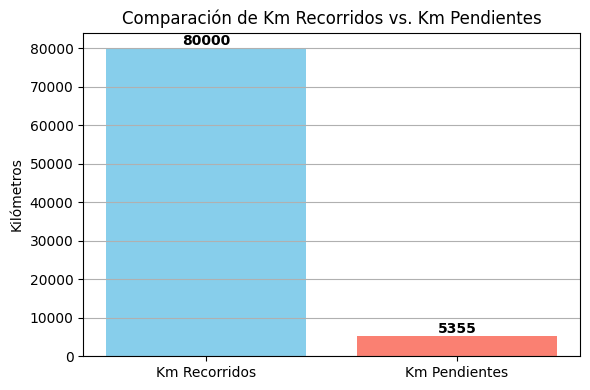

In [18]:
# Define la variable para el input de valor (Ult Km/Hr) Kilometraje recorrido
ult_km_hr_value = float(input('Ingrese la cantidad de kilómetros recorridos: '))
km_hr_pend_predicho = model.predict([[ult_km_hr_value]])[0][0]
print(f"El vehículo tiene aproximadamente {km_hr_pend_predicho:.2f} Km restantes antes del próximo mantenimiento.")

#Visualizar el resultado
labels = ['Km Recorridos', 'Km Pendientes']
values = [ult_km_hr_value, km_hr_pend_predicho]

plt.figure(figsize=(6, 4))
plt.bar(labels, values, color=['skyblue', 'salmon'])
plt.title('Comparación de Km Recorridos vs. Km Pendientes')
plt.ylabel('Kilómetros')
plt.grid(axis='y')

for i, v in enumerate(values):
    plt.text(i, v + max(values)*0.01, f'{v:.0f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

El resultado Km/Hr Pend predicho: 6365.85826385 significa que, según tu modelo de regresión lineal, para un vehículo con 300,000 Kilómetros/Horas registrados (Ult Km/Hr), la cantidad esperada de Kilómetros/Horas pendientes (Km/Hr Pend) es aproximadamente 6365.86.

Contexto: La interpretación de este valor debe hacerse dentro del contexto de tus datos y lo que representan Km/Hr Pend y Ult Km/Hr. Si Km/Hr Pend indica cuánto falta para un próximo mantenimiento, entonces la predicción sugiere que un vehículo con 300,000 Km/Hr tiene aproximadamente 6365.86 Km/Hr restantes antes de su próximo mantenimiento.